### Obtaining the Efficient Frontier in Python

In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
#plotting matplotlib graphs just below code cells and storing them in the 
#notebook document

In [4]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [5]:
pf_data.tail()

,PG,^GSPC
Date,,
2021-03-22,130.179993,3940.590088
2021-03-23,132.600006,3910.520020
2021-03-24,132.559998,3889.139893
2021-03-25,133.479996,3909.520020
2021-03-26,135.449997,3974.540039


<AxesSubplot:xlabel='Date'>

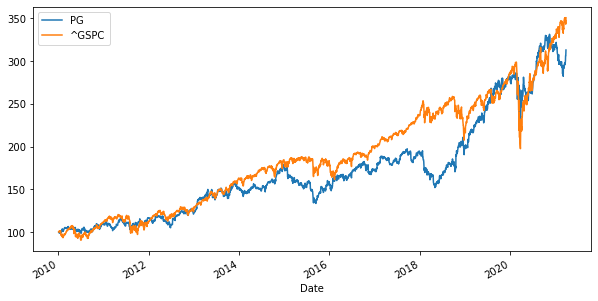

In [7]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))
#assets performance throughout the concerned time frame


In [9]:
#obtaining the efficient frontier
log_returns = np.log(pf_data / pf_data.shift(1))

In [10]:
#average
log_returns.mean() * 250


PG       0.100939
^GSPC    0.111027
dtype: float64

In [11]:
#coveriance
log_returns.cov() * 250

,PG,^GSPC
PG,0.029200,0.017714
^GSPC,0.017714,0.030493


In [12]:
#correlation
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.593655
^GSPC,0.593655,1.000000


In [13]:
#as above, returns are well correlated

In [14]:
#portfolio optimisation
#creating a variable carrying the number of assets in a portfolio

num_assets = len(assets)


In [15]:
num_assets

2

In [25]:
arr = np.random.random(2)
arr

array([0.90678995, 0.67860727])

In [26]:
arr[0] + arr[1]

1.5853972238288474

In [29]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights
#weights is an array
#it enables to obtain to randomly generated weights whose sum equals 1

array([0.25815942, 0.74184058])

In [30]:
weights[0] + weights[1]

1.0

#### Expected Portfolio Return

In [33]:
np.sum(weights * log_returns.mean()) * 250
#sum of the annualised log returns

0.10842268029630224

#### Expected Portfolio Variance

In [32]:
np.dot(weights.T, np.dot(log_returns.cov()*250, weights))

0.025512283210990125

#### Expected Portfolio Volatility

In [34]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250, weights)))

0.15972564982178072

In [38]:
pfolio_returns = []
pfolio_volatilities = []
#loop for two weights whose sum equals 1

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))

pfolio_returns, pfolio_volatilities

([0.1064474998527056,
  0.10638368411091088,
  0.10522054150876001,
  0.10560693044211769,
  0.11084853537802865,
  0.11024147858111041,
  0.10403895181121613,
  0.10842142263490598,
  0.10137352282034516,
  0.11028406485701199,
  0.10806812668952798,
  0.10329308367878781,
  0.10414413837658344,
  0.10537663701961676,
  0.10703907939671353,
  0.1021891107101473,
  0.11077551096460204,
  0.10763379525157588,
  0.10136712647175017,
  0.10663782313576432,
  0.1043695942274796,
  0.10648611306030334,
  0.1075818350527452,
  0.10904777030594372,
  0.10539372644446338,
  0.10572638517158882,
  0.108967743454711,
  0.10552812430748079,
  0.10684508946508318,
  0.10733374268997321,
  0.108185366431619,
  0.10725935573562917,
  0.10974582087058482,
  0.10684643373293459,
  0.10803005506926806,
  0.10616753509533976,
  0.10559155632286331,
  0.10595185244361666,
  0.10641322162006135,
  0.10789658332608189,
  0.10519403215139883,
  0.10711026321858015,
  0.10758105378728901,
  0.107664910018188

In [41]:
#creating array
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))

pfolio_returns = np.array(pfolio_returns)

pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.10524031, 0.10390817, 0.10355603, 0.10622344, 0.10770348,
        0.11054363, 0.10524862, 0.10230072, 0.10621083, 0.1036583 ,
        0.10537471, 0.10643924, 0.10466975, 0.1021042 , 0.10563235,
        0.10216695, 0.10785212, 0.10404253, 0.10377398, 0.10671163,
        0.10997825, 0.10880069, 0.10920468, 0.10783131, 0.10451561,
        0.10414521, 0.10519558, 0.10748815, 0.10684142, 0.10288174,
        0.10750937, 0.10768214, 0.10461251, 0.1061785 , 0.10875872,
        0.1056562 , 0.10578096, 0.10571118, 0.10651417, 0.1053649 ,
        0.10271815, 0.10591917, 0.10169394, 0.10716221, 0.10653706,
        0.10384616, 0.10723061, 0.11038831, 0.10183299, 0.10270328,
        0.10550953, 0.10895951, 0.11068845, 0.10492271, 0.10425221,
        0.10744368, 0.10248426, 0.10646266, 0.10708161, 0.10778001,
        0.10606836, 0.10233002, 0.10467055, 0.11018965, 0.10274237,
        0.11023082, 0.10691518, 0.10328957, 0.10302899, 0.10144474,
        0.10643624, 0.10616464, 0.10371415, 0.10

In [44]:
#creating data frame object
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility':pfolio_volatilities})

In [45]:
portfolios.head()

,Return,Volatility
0,0.105240,0.154327
1,0.103908,0.156655
2,0.103556,0.157714
3,0.106223,0.154353
4,0.107703,0.157184


In [46]:
portfolios.tail()

,Return,Volatility
995,0.106921,0.155275
996,0.109850,0.166858
997,0.106785,0.155037
998,0.107003,0.155432
999,0.105842,0.154166


Text(0, 0.5, 'Expected Return')

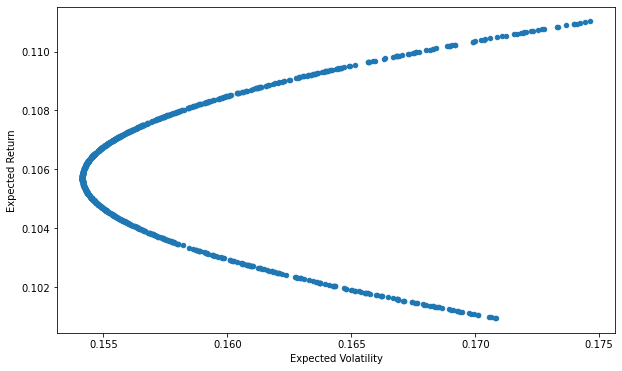

In [49]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')